In [1]:
import pickle
import cv2
import glob
import os

print('Done Importing')

Done Importing


In [2]:
image_path = glob.glob('./test_images/test1.jpg')[0]
image_filename = os.path.basename(image_path)
image = cv2.imread(image_path)

camera_calibration_file = './camera_calibration.p'
with open(camera_calibration_file, mode='rb') as f:
    cali_data = pickle.load(f)
mtx, dist = cali_data['mtx'], cali_data['dist']
print('Camera matrix:', mtx)
print('Distortion coefficients: ', dist)

Camera matrix: [[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Distortion coefficients:  [[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


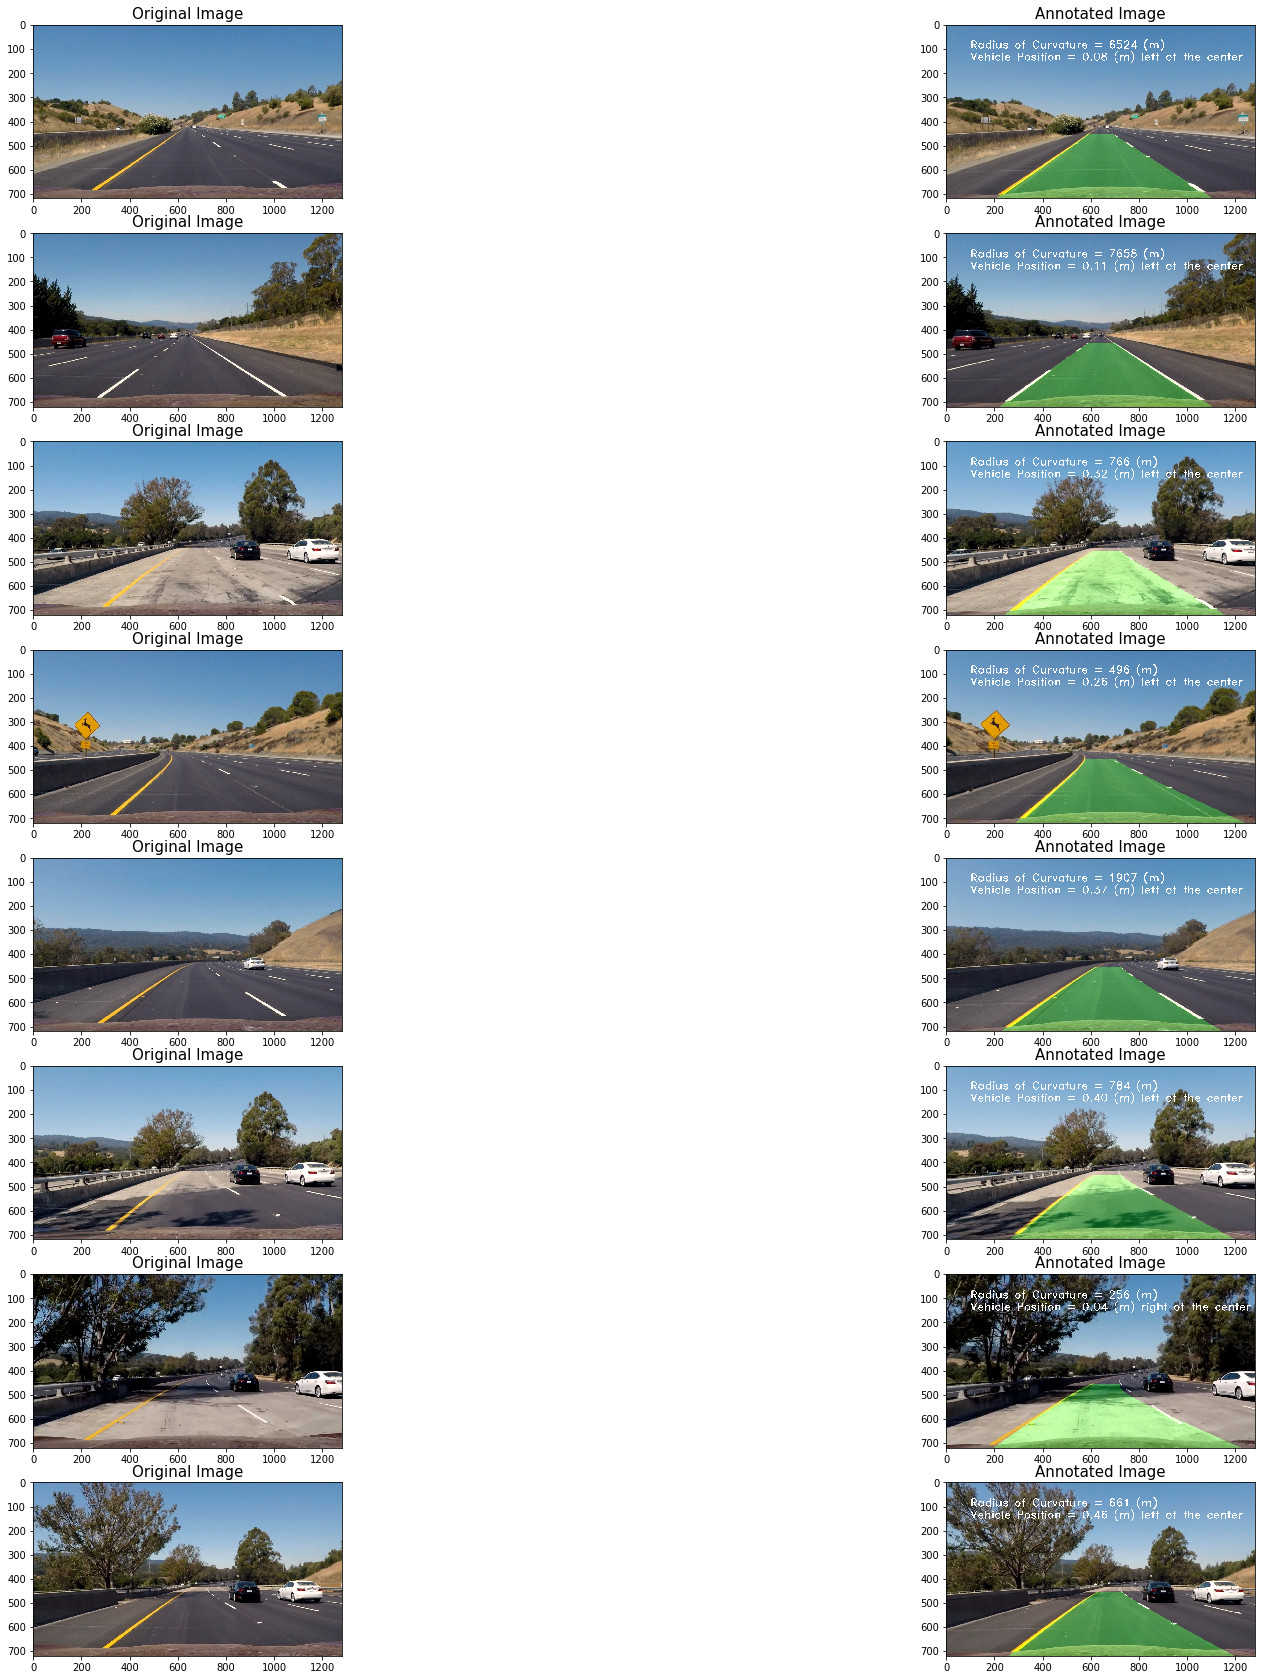

In [3]:
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from Video import Video
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load images
fnames = glob.glob('test_images/*')
images = []
for fname in fnames:
    
    img = mpimg.imread(fname)
    images.append(img)
    
types = 2
f, axes = plt.subplots(len(images), types, figsize=(30,30))
axes = axes.ravel()

binary_select_dict = {}
for i, image in enumerate(images):
    video = Video(cali_data)
    axes[types*i].imshow(image)
    axes[types*i].set_title('Original Image', fontsize=15)
    
    axes[types*i+1].imshow(video.process(image))
    axes[types*i+1].set_title('Annotated Image', fontsize=15)

In [4]:
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from Video import Video

video = Video(cali_data)

proj_output = 'output_videos/project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4").subclip(0,10)
proj_clip = clip1.fl_image(video.process) #NOTE: this function expects color images!!
%time proj_clip.write_videofile(proj_output, audio=False)

[MoviePy] >>>> Building video output_videos/project_video_output.mp4
[MoviePy] Writing video output_videos/project_video_output.mp4


100%|█████████▉| 250/251 [00:35<00:00,  4.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video_output.mp4 

CPU times: user 46.5 s, sys: 10.8 s, total: 57.3 s
Wall time: 36.8 s
